<a href="https://colab.research.google.com/github/GaCampioto/tech-challenges-fiap-AI-for-developers/blob/main/tech_challenge_fase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos genéticos - Knapsack problem

Dada um container com uma capacidade máxima de peso e um conjunto de itens, cada um com um peso e valor associados. É necessário descobrir qual a melhor combinação de itens para atingir o maior valor dentro da capacidade máxima do container.

Para solução vamos implementar um algoritmo genético, utilizando uma geração aleatória de população inicial, seleção por torneio e crossover e mutação pela técnica de one point.

Como resultado teremos uma lista com a melhor solução de cada geração e a última geração avaliada.

In [276]:
# criação da classe para representar os itens que vamos guardar dentro do container

class Item:
    def __init__(self, id, weight, value):
        self.id = id
        self.weight = weight
        self.value = value

    def __str__(self):
        return "id: " + str(self.id) + " weight: " + str(self.weight) + " value: " + str(self.value)

In [277]:
import random

# capacidade máxima do container
container_capacity = 25.0

# parametros do algoritmo genético
population_size = 10
generation_size = 100
mutation_rate = 0.1

# criando uma lista de itens com 5-15 itens
item_list = []
for i in range(1, random.randint(5, 15)):
  id, w, v = i, random.randint(1, 10), random.randint(1, 10)
  item_list.append(Item(int(id), float(w), float(v)))

In [278]:
# criação de soluções aleatórias com base nos itens disponiveis
def create_random_solution(items):
    solution = []
    for i in range(0, len(items)):
        solution.append(random.randint(0, 1))
    return solution

In [279]:
# verifica se as soluções criadas atendem os requisitos necessários
def valid_solution(items, solutions, limit):
    total_weight = 0
    for i in range(0, len(items)):
        if solutions[i] == 1:
            total_weight += items[i].weight
        if total_weight > limit:
            return False
    return True

In [280]:
# cálculo do peso e valor dos items que estão na solução
def calculate_value(items, solutions):
    total_value = 0
    total_weight = 0
    for i in range(0, len(solutions)):
        if solutions[i] == 1:
            total_value += items[i].value
            total_weight += items[i].weight
    return total_value, total_weight

In [281]:
# validação de soluções duplicadas
def check_duplicate_solutions(solutions_1, solutions_2):
    for i in range(0, len(solutions_1)):
        if solutions_1[i] != solutions_2[i]:
            return False
    return True

In [282]:
# criação da população inicial utilizando a lista de itens, tamanho da população e capacidade máxima do container
def initial_population(pop_size, items, capacity):
    population = []
    i = 0
    while i < pop_size:
        new_solution = create_random_solution(items)
        if valid_solution(items, new_solution, capacity):
            if len(population) == 0:
                population.append(new_solution)
                i += 1
            else:
                # validação para ver se a solução criada é repetida, se for pula essa e cria uma nova
                skip = False
                for j in range(0, len(population)):
                    if check_duplicate_solutions(new_solution, population[j]):
                        skip = True
                        continue
                if not skip:
                    population.append(new_solution)
                    i += 1
    return population

In [283]:
# seleção utilização o método de torneio, ou seja, pega duas soluções aleatórias e verifica qual é a melhor
def tournament_selection(pop):
    ticket_1 = random.randint(0, len(pop) - 1)
    ticket_2 = random.randint(0, len(pop) - 1)
    value_ticket1, ignored_1 = calculate_value(item_list, pop[ticket_1])
    value_ticket2, ignored_2 = calculate_value(item_list, pop[ticket_2])
    if value_ticket1 > value_ticket2:
        winner = pop[ticket_1]
    else:
        winner = pop[ticket_2]

    return winner

In [284]:
# operação de one point crossover, recebe os dois pais e mistura as soluções pegando um pedaço de cada com base em um ponto especifico.
def crossover(p_1, p_2):
    break_point = random.randint(0, len(p_1))
    first_part = p_1[:break_point]
    second_part = p_2[break_point:]
    child = first_part + second_part
    if valid_solution(item_list, child, container_capacity):
        return child
    else:
        return crossover(p_1, p_2)

In [285]:
# operação de one point mutation
def mutation(chromosome):
    temp = chromosome
    mutation_index_1, mutation_index_2 = random.sample(range(0, len(chromosome)), 2)
    temp[mutation_index_1], temp[mutation_index_2] = temp[mutation_index_2], temp[mutation_index_1]

    if valid_solution(item_list, temp, container_capacity):
        return temp
    else:
        return mutation(chromosome)

In [286]:
# criação da próxima geração com base na geração atual
# executa a seleção por torneio e realiza o crossover com os vencedores para gerar o filho
# em alguns casos, de acordo com um número aleatório, aplica a mutação
def create_generation(pop, mut_rate):
    new_gen = []
    for i in range(0, len(pop)):
        parent_1 = tournament_selection(pop)
        parent_2 = tournament_selection(pop)
        child = crossover(parent_1, parent_2)

        if random.random() < mut_rate:
            child = mutation(child)

        new_gen.append(child)
    return new_gen

In [287]:
# recupera a melhor solução da geração respeitando o valor
def best_solution(generation, items):
    best = 0
    for i in range(0, len(generation)):
        temp, ignored = calculate_value(items, generation[i])
        if temp > best:
            best = temp
    return best

In [288]:
value_list = []  # lista com as melhores soluções para criação do gráfico final com a melhor solução de cada geração

# controle do loop principal do algoritmo genético
# criação da população inicial e início do algoritmo
# criação de novas gerações até que atinja o tamanho máximo de gerações
# armazena a melhor solução da geração na lista de resultados
# retorna a última geração e a lista das melhores soluções
def genetic_algorithm(capacity, p_size, gen_size, mutation_rate, items):
    pop = initial_population(p_size, items, capacity)
    for i in range(0, gen_size):
        pop = create_generation(pop, mutation_rate)
        print("melhor solução da geração: ", pop[0])
        value, weight = calculate_value(items, pop[0])
        print(f"resultado da solução: valor - {value} peso - {weight}")
        value_list.append(best_solution(pop, items))
    return pop, value_list

==ITENS==
item:  id: 1 weight: 9.0 value: 4.0
item:  id: 2 weight: 6.0 value: 7.0
item:  id: 3 weight: 9.0 value: 6.0
item:  id: 4 weight: 1.0 value: 4.0
item:  id: 5 weight: 3.0 value: 10.0
item:  id: 6 weight: 7.0 value: 2.0
item:  id: 7 weight: 5.0 value: 8.0
item:  id: 8 weight: 1.0 value: 2.0
item:  id: 9 weight: 8.0 value: 10.0
item:  id: 10 weight: 1.0 value: 9.0
item:  id: 11 weight: 5.0 value: 1.0
item:  id: 12 weight: 8.0 value: 1.0
capacidade total:  25.0
melhor solução da geração:  [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
resultado da solução: valor - 29.0 peso - 22.0
melhor solução da geração:  [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
resultado da solução: valor - 27.0 peso - 21.0
melhor solução da geração:  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
resultado da solução: valor - 35.0 peso - 19.0
melhor solução da geração:  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
resultado da solução: valor - 36.0 peso - 24.0
melhor solução da geração:  [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]
resultado da sol

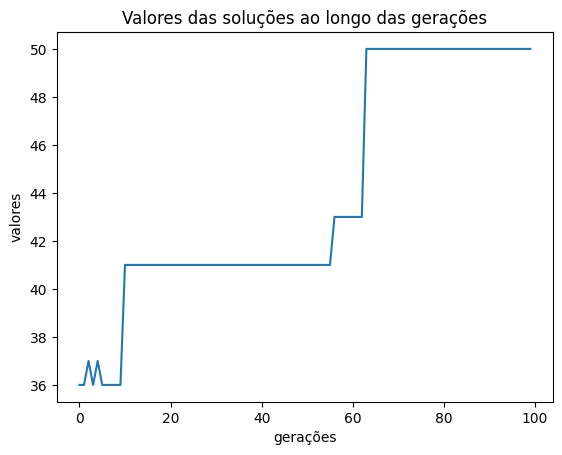

In [289]:
# geração do gráfico com os resultados
import matplotlib.pyplot as plt

print("==ITENS==")
for i in item_list:
    print("item: ", i)
print("capacidade total: ", container_capacity)

# última geração ao final da execução do algoritmo e lista com as melhores soluções
latest_pop, v_list = genetic_algorithm(capacity=container_capacity,
                                       p_size=population_size,
                                       gen_size=generation_size,
                                       mutation_rate=mutation_rate,
                                       items=item_list)
print("última geração: ", latest_pop)
print("melhores soluções: ", v_list)
# gráfico com os resultados
plt.plot(v_list)
plt.xlabel('gerações')
plt.ylabel('valores')
plt.title("Valores das soluções ao longo das gerações")
plt.show()

# Conclusões

Com base nos resultados podemos ver que ao longo das gerações os resultados vão melhorando até encontrar um platô, no caso da última geração é possível verificar que esse platô foi alcançado por volta da geração 65.